#Chapter 2

##Sumary Statistics

###Summarizing numerical data

There are lots of summary statistics that you can calculate like mean , median and mode, minimum and maximum, and variance and deviation. Pandas also allows you to make sums and calculate quantiles

* `.median()`

* `.mode()`

* `.min() `

* `.max()`

* `.var()`

* `.std()`


## The `.agg()` Method

In [ ]:
def pct30(column):
  return column.quantile(0.3)
  #Agg can be used with just one column or multiple columns

### `.cumsum()`

Calling cumsum on a column returns not just one number, but a number for each row of the DataFrame. There are other methods for cumulative statistics like:

* `.cummax()`

* `.cummin()`

* `.cumprod() `

#Let's work!

In this chapter we'll use a dataset containing Walmart's sales. Let's explore it :

In [3]:
import pandas as pd
walmart=pd.read_csv('sales.csv')

###Brief look

In [ ]:
walmart.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [ ]:
walmart.columns

Index(['Unnamed: 0', 'store', 'type', 'department', 'date', 'weekly_sales',
       'is_holiday', 'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')

In [ ]:
walmart.shape

(10774, 10)

In [ ]:
walmart.describe()

,Unnamed: 0,store,department,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000
mean,5386.500000,15.441897,45.218118,23843.950149,15.731978,0.749746,8.082009
std,3110.330234,11.534511,29.867779,30220.387557,9.922446,0.059494,0.624355
min,0.000000,1.000000,1.000000,-1098.000000,-8.366667,0.664129,3.879000
25%,2693.250000,4.000000,20.000000,3867.115000,7.583333,0.708246,7.795000
50%,5386.500000,13.000000,40.000000,12049.065000,16.966667,0.743381,8.099000
75%,8079.750000,20.000000,72.000000,32349.850000,24.166667,0.781421,8.360000
max,10773.000000,39.000000,99.000000,293966.050000,33.827778,1.107674,9.765000


In [ ]:
walmart["store"].value_counts()

,count
store,
13,913
20,910
19,906
10,902
4,901
1,901
27,900
2,897
6,894


##Exercises

In [4]:
sales=walmart
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())

# Print the median of weekly_sales
print(sales["weekly_sales"].median())

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

##Summarizing dates

In [ ]:
sales["date"].max()

sales["date"].min()

'2012-10-26'

In [ ]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


<ipython-input-16-bb535bb73a13>:7: FutureWarning: The provided callable <function median at 0x7a54b0e1b060> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))
<ipython-input-16-bb535bb73a13>:7: FutureWarning: The provided callable <function median at 0x7a54b0e1b060> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))
<ipython-input-16-bb535bb73a13>:7: FutureWarning: The provided callable <function median at 0x7a54b0e1b060> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the stri

In [ ]:
sales_1_1=sales
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date",)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] =sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"]=sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]]

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,2.492450e+04,24924.50
6437,2010-02-05,38597.52,6.352202e+04,38597.52
1249,2010-02-05,3840.21,6.736223e+04,38597.52
6449,2010-02-05,17590.59,8.495282e+04,38597.52
6461,2010-02-05,4929.87,8.988269e+04,38597.52
...,...,...,...,...
3592,2012-10-05,440.00,2.568932e+08,293966.05
8108,2012-10-05,660.00,2.568938e+08,293966.05
10773,2012-10-05,915.00,2.568947e+08,293966.05
6257,2012-10-12,3.00,2.568947e+08,293966.05


##Counting

### Dropping duplicate names

Using the `.drop_duplicates(subset="the column")` Let's say you got  a vet..if you have a pet that has been listed multiple times ,you can fix this by dropping the duplicate values of the specific dog and leaving only one registry.

In [ ]:
unique_dogs=vet_visits.drop_duplicates(subset=["name","breed"])

###Counting values

In [ ]:
unique_dogs["breed"].value_counts(sort=True)

##Dropping duplicates exercise

In [14]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store","type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store","department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[(sales["is_holiday"]==True)].drop_duplicates("date")

# Print date col of holiday_dates
print(holiday_dates["date"])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

In [15]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of stores of each department and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of stores of each department and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

type
A    11
B     1
Name: count, dtype: int64
type
A    0.916667
B    0.083333
Name: proportion, dtype: float64
department
1     12
2     12
3     12
4     12
5     12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64
department
1     0.012917
2     0.012917
3     0.012917
4     0.012917
5     0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


##Summaries by group

In [12]:
sales.groupby("type")["weekly_sales"].mean()

,weekly_sales
type,
A,23674.667242
B,25696.678370


##Multiple groupe summaries

In [ ]:
sales.groupby("type")[["weekly_sales","fuel_price_usd_per_l"]].agg([min,max,np.mean])

<ipython-input-22-200f9496606a>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sales.groupby("type")[["weekly_sales","fuel_price_usd_per_l"]].agg([min,max,np.mean])
<ipython-input-22-200f9496606a>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sales.groupby("type")[["weekly_sales","fuel_price_usd_per_l"]].agg([min,max,np.mean])
<ipython-input-22-200f9496606a>:1: FutureWarning: The provided callable <function mean at 0x7a54b3bcdda0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sales.groupb

weekly_sales                          fuel_price_usd_per_l            \
              min        max          mean                  min       max   
type                                                                        
A         -1098.0  293966.05  23674.667242             0.664129  1.107410   
B          -798.0  232558.51  25696.678370             0.760023  1.107674   

                
          mean  
type            
A     0.744619  
B     0.805858

##Group by multiple variables

In [11]:
sales.groupby(["type","store"])["weekly_sales"].mean()

type  store
A     1        20896.941787
      2        26517.435162
      4        26126.986071
      6        21561.186477
      13       25664.149474
      14       30384.003017
      19       19930.838157
      20       28382.766385
      27       24207.474711
      31       18178.932225
      39       18414.938423
B     10       25696.678370
Name: weekly_sales, dtype: float64

##Many groups, many summaries

In [10]:
sales.groupby(["type","department","date"])[["weekly_sales","unemployment"]].mean()

weekly_sales  unemployment
type department date                                  
A    1          2010-02-05  31197.634545      8.297455
                2010-03-05  24709.420909      8.297455
                2010-04-02  89270.580000      8.069545
                2010-05-07  22280.156364      8.069545
                2010-06-04  21755.329091      8.069545
...                                  ...           ...
B    98         2010-09-03    300.250000      9.199000
                2010-10-01     46.000000      9.003000
                2010-11-05   1075.300000      9.003000
                2010-12-03    999.420000      9.003000
                2011-01-07     36.360000      8.744000

[2084 rows x 2 columns]

In [9]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].cumsum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].cumsum()

In [8]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"]=="B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"]=="C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [6]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [7]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [5]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg( [np.min,np.max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment","fuel_price_usd_per_l"]].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


<ipython-input-5-3afd8ebab2b7>:5: FutureWarning: The provided callable <function min at 0x7fcf62d8d4e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sales_stats = sales.groupby("type")["weekly_sales"].agg( [np.min,np.max,np.mean,np.median])
<ipython-input-5-3afd8ebab2b7>:5: FutureWarning: The provided callable <function max at 0x7fcf62d8d3a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sales_stats = sales.groupby("type")["weekly_sales"].agg( [np.min,np.max,np.mean,np.median])
<ipython-input-5-3afd8ebab2b7>:5: FutureWarning: The provided callable <function mean at 0x7fcf62d8dda0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "me

##Pivot table

in a pivot , the "values" argument is the column that you want to summarize, the index column is the column that you want to group by.

By default, pivot takes the mean value of each group


* Values : it's the column to aggregate

* Index: the row category

* columns: the column category

* aggfunc : it can be mean, 'sum' etc.


so for:

in `pivot = df.pivot_table(
  values="Salary",
  index="Department",
  columns="Gender",
  aggfunc='mean'`

we would get:

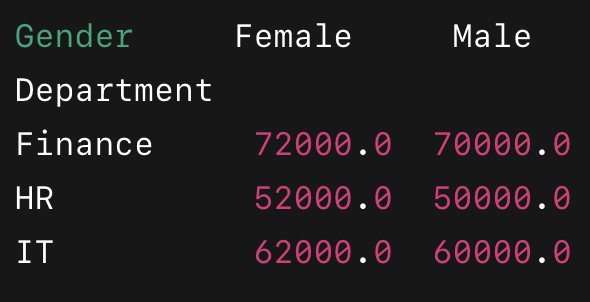


In [17]:
import numpy as np

sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.median,np.mean])


<ipython-input-17-5fcc722a534e>:3: FutureWarning: The provided callable <function median at 0x7fcf5fb23060> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.median,np.mean])
<ipython-input-17-5fcc722a534e>:3: FutureWarning: The provided callable <function mean at 0x7fcf62d8dda0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.median,np.mean])


,median,mean
,weekly_sales,weekly_sales
type,,
A,11943.92,23674.667242
B,13336.08,25696.678370


In [18]:
sales.pivot_table(values="weekly_sales",index="type",columns="is_holiday",aggfunc=[np.median,np.mean])

<ipython-input-18-e93975aadeac>:1: FutureWarning: The provided callable <function median at 0x7fcf5fb23060> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sales.pivot_table(values="weekly_sales",index="type",columns="is_holiday",aggfunc=[np.median,np.mean])
<ipython-input-18-e93975aadeac>:1: FutureWarning: The provided callable <function mean at 0x7fcf62d8dda0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sales.pivot_table(values="weekly_sales",index="type",columns="is_holiday",aggfunc=[np.median,np.mean])


median                   mean           
is_holiday      False    True          False      True 
type                                                   
A           12028.955   37.500  23768.583523  590.04525
B           13348.680  810.705  25751.980533  810.70500

In [19]:
# Pivot for mean weekly_sales for each store type
import numpy as np
mean_sales_by_type = sales.pivot_table(values="weekly_sales",index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [20]:


# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.median,np.mean])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

           median          mean
     weekly_sales  weekly_sales
type                           
A        11943.92  23674.667242
B        13336.08  25696.678370


<ipython-input-20-b5cf7eab9be1>:2: FutureWarning: The provided callable <function median at 0x7fcf5fb23060> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  mean_med_sales_by_type = sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.median,np.mean])
<ipython-input-20-b5cf7eab9be1>:2: FutureWarning: The provided callable <function mean at 0x7fcf62d8dda0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_med_sales_by_type = sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.median,np.mean])


In [21]:
# Pivot for mean weekly_sales by store type and holiday
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales",index="type",columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


El parametro margins agrega una fila / columna extra con los totales ( *el resultado de aplicar la función de agregación sobre todas las filas o columnas*)

In [1]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))

NameError: name 'sales' is not defined